In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
pwd

'C:\\Users\\ASUS\\Desktop\\DA projects\\Bellabeat'

In [4]:
path = 'Data\\'

In [5]:
path + 'dailyActivity_merged.csv'

'Data\\dailyActivity_merged.csv'

## Import data

In [6]:
dailyActivity_merged = pd.read_csv(path + 'dailyActivity_merged.csv')
hourlyCalories_merged = pd.read_csv(path + 'hourlyCalories_merged.csv')
hourlySteps_merged = pd.read_csv(path + 'hourlySteps_merged.csv')
sleepDay_merged = pd.read_csv(path + 'sleepDay_merged.csv')
weightLogInfo_merged = pd.read_csv(path + 'weightLogInfo_merged.csv')
hourlyIntensities_merged = pd.read_csv(path + 'hourlyIntensities_merged.csv')

## Process Dataset

In [7]:
dailyActivity_merged.isnull().sum()
hourlyCalories_merged.isnull().sum()
hourlySteps_merged.isnull().sum()
sleepDay_merged.isnull().sum()
weightLogInfo_merged.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [8]:
days = {0:'Mon',1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5: 'Sat', 6: 'Sun'}

In [9]:
# Monday = 0, Sunday = 6
dailyActivity_merged['day_of_week'] = (pd.to_datetime(dailyActivity_merged.ActivityDate).dt.dayofweek)
hourlyIntensities_merged['hour'] = pd.to_datetime(hourlyIntensities_merged['ActivityHour']).dt.hour

# To merge data
sleepDay_merged['ActivityDate'] = pd.to_datetime(sleepDay_merged['SleepDay']).dt.date

## Explore Data

In [10]:
len(dailyActivity_merged.Id.unique())
len(hourlyCalories_merged.Id.unique())
len(hourlySteps_merged.Id.unique())
len(sleepDay_merged.Id.unique())
len(weightLogInfo_merged.Id.unique())

8

## Summary data

In [11]:
#BMI infor of each person
# Caculate average of each person
weight_average = weightLogInfo_merged.groupby('Id')[['BMI','WeightKg']].mean()
weight_average.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,8.0,27.988011,8.236066,21.570001,23.6835,26.350542,27.561250,47.540001
WeightKg,8.0,77.811146,26.051549,52.599998,60.4150,70.995001,86.534375,133.500000


In [12]:
sleepDay_average = sleepDay_merged.groupby('Id')[['TotalSleepRecords', 'TotalMinutesAsleep','TotalTimeInBed']].mean()
sleepDay_average.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalSleepRecords,24.0,1.096897,0.152415,1.0,1.00000,1.019231,1.129464,1.6
TotalMinutesAsleep,24.0,377.647518,136.764040,61.0,336.28125,419.071429,449.281250,652.0
TotalTimeInBed,24.0,420.095938,173.901710,69.0,377.06250,447.882143,485.317708,961.0


In [13]:
# Caculate average of each person
average_user_dailyActivity = dailyActivity_merged.groupby('Id')[['TotalSteps','TotalDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']].mean()
average_user_dailyActivity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalSteps,33.0,7519.272678,3576.340125,916.129032,5566.870968,7282.966667,9519.666667,16040.032258
TotalDistance,33.0,5.398953,2.772293,0.634516,3.454839,5.295333,6.913548,13.212903
VeryActiveMinutes,33.0,20.308769,23.803214,0.096774,3.580645,10.387097,23.419355,87.333333
FairlyActiveMinutes,33.0,13.260240,12.108217,0.258065,4.034483,12.322581,19.354839,61.266667
LightlyActiveMinutes,33.0,191.521291,75.689747,38.580645,143.838710,206.193548,245.806452,327.900000
SedentaryMinutes,33.0,999.151475,227.678526,662.322581,766.419355,1077.550000,1206.612903,1317.419355
Calories,33.0,2282.443660,562.761632,1483.354839,1916.967742,2131.769231,2599.620690,3436.580645


In [16]:
# Diffenrece between the time in bed and the time feel asleep

sleepDay_average.TotalTimeInBed.mean() - sleepDay_average.TotalMinutesAsleep.mean()

42.4484201224775

## Merge data

In [130]:
sleepDay_slice = sleepDay_merged.loc[:,['Id','TotalMinutesAsleep','ActivityDate']]
dailyActivity_slice =  dailyActivity_merged.loc[:,['Id','SedentaryMinutes','ActivityDate']]
dailyActivity_slice['ActivityDate'] = pd.to_datetime(dailyActivity_slice.ActivityDate).dt.date
t1 = sleepDay_slice.merge(dailyActivity_slice, how='inner', on=['Id','ActivityDate'])

## Data Visulazation

In [14]:
# Pre-visulazation
very_active_avg = dailyActivity_merged.groupby('day_of_week')[['VeryActiveMinutes']].mean().rename(days)
Calories_avg = dailyActivity_merged.groupby('day_of_week')[['Calories']].mean().rename(days)
TotalSteps_avg = dailyActivity_merged.groupby('day_of_week')[['TotalSteps']].mean().rename(days)
avg_intensites_per_hour = hourlyIntensities_merged.groupby('hour')[['TotalIntensity']].mean()


In [148]:
very_active_avg

,VeryActiveMinutes
day_of_week,
Mon,23.108333
Tue,22.953947
Wed,20.780000
Thu,19.408163
Fri,20.055556
Sat,21.919355
Sun,19.983471


In [151]:
# Merge data 
Calories_avg.merge(TotalSteps_avg, how='inner', on=['day_of_week'])

,Calories,TotalSteps
day_of_week,,
Mon,2324.208333,7780.866667
Tue,2356.013158,8125.006579
Wed,2302.620000,7559.373333
Thu,2199.571429,7405.836735
Fri,2331.785714,7448.230159
Sat,2354.967742,8152.975806
Sun,2263.000000,6933.231405


In [152]:
avg_intensites_per_hour

,TotalIntensity
hour,
0,2.129550
1,1.419078
2,1.043944
3,0.443730
4,0.633047
5,4.950644
6,7.771214
7,10.733620
8,14.668099


In [156]:
t1.to_csv('C:\\Users\\ASUS\\Desktop\\SleepvsSendentary.csv')

Text(0, 0.5, 'Total Steps')

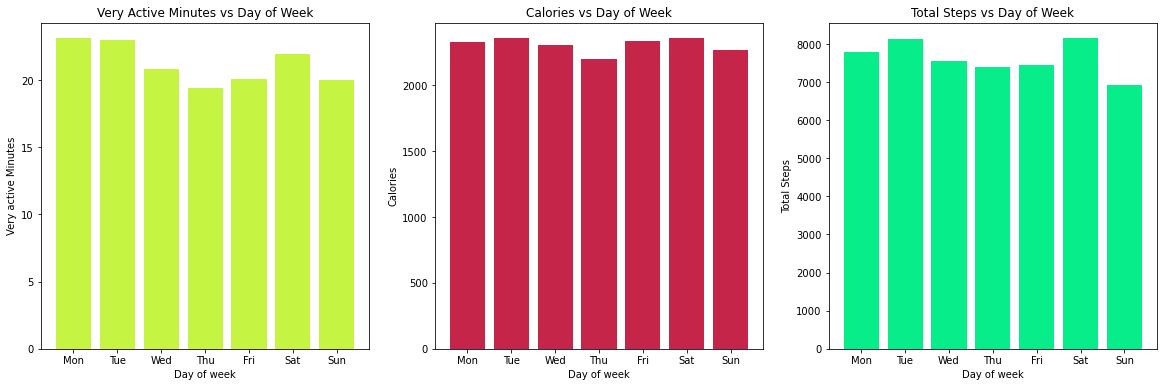

In [15]:
fig = plt.figure(figsize = (20,6))
ax = plt.subplot(131)  

###  Very active Minutes
plt.bar(very_active_avg.index, very_active_avg.VeryActiveMinutes, color='#c5f542')
plt.title('Very Active Minutes vs Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Very active Minutes')

### Calories vs Day of Week
ax = plt.subplot(132)  
plt.bar(Calories_avg.index, Calories_avg.Calories, color='#c42548')
plt.title('Calories vs Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Calories')

### Total Steps vs Day of Week
ax = plt.subplot(133)  
plt.bar(very_active_avg.index, TotalSteps_avg.TotalSteps, color='#07ed89')
plt.title('Total Steps vs Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Total Steps')

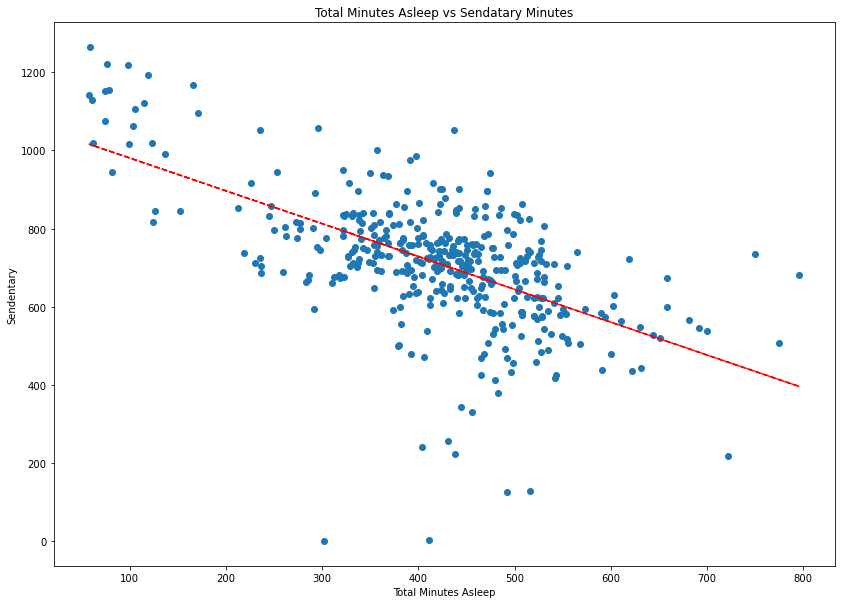

In [141]:
# Total Minutes Asleep vs Sendatary Minutes
plt.figure(figsize = (14,10))
plt.scatter(t1.TotalMinutesAsleep, t1.SedentaryMinutes)
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Sendentary')
plt.title('Total Minutes Asleep vs Sendatary Minutes')
# CACULATE trend line 
z = np.polyfit(t1.TotalMinutesAsleep, t1.SedentaryMinutes, 1)
p = np.poly1d(z)
plt.plot(t1.TotalMinutesAsleep,p(t1.TotalMinutesAsleep),"r--")
plt.show()

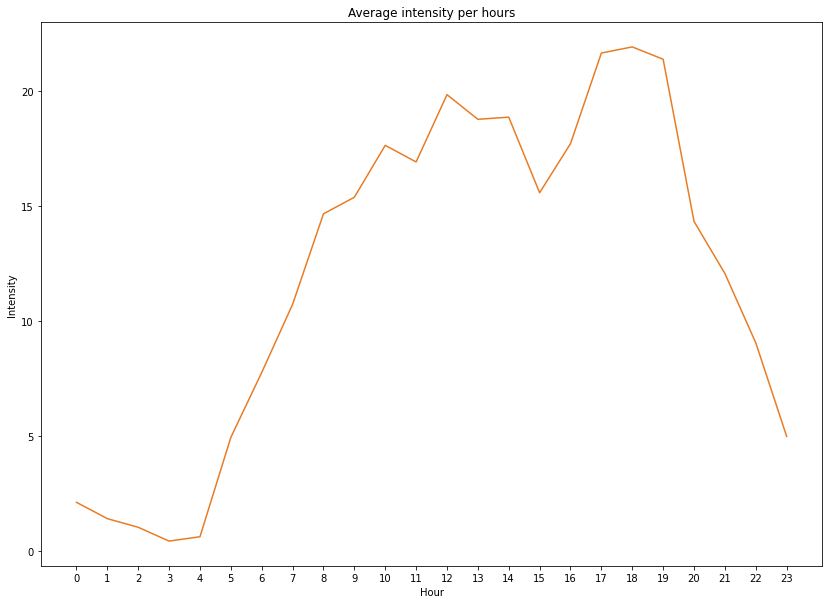

In [146]:
# Average intensities per hour
plt.figure(figsize = (14,10))
plt.plot(avg_intensites_per_hour.index, avg_intensites_per_hour, color='#e87b23')
plt.xticks(np.arange(0,24,1))
plt.title('Average intensity per hours')
plt.xlabel('Hour')
plt.ylabel('Intensity')
plt.show()